In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,13]
import scipy.optimize as sco 

MODELO COVID-19 Ecuador. 17 de Marzo

In [0]:
#Creación de vectores de días de contagios y número de contagiados desde el 29 de febrero hasta el 17 de marzo

#Nota 1: 1=29 de febrero, 2=1 de marzo, ..., 18=17 de marzo

vcovid19=np.zeros(14)
for i in range(0,3):
    vcovid19[i]=(1+i)
for i in range(3,6):
    vcovid19[i]=(2+i)
for i in range(6,7):
    vcovid19[i]=(i+3)
for i in range(7,8):
    vcovid19[i]=(i+4)
for i in range(8,14):
    vcovid19[i]=(i+5)
v2covid19=np.zeros(14)
v2covid19[0]=1
v2covid19[1]=6
v2covid19[2]=7
v2covid19[3]=10
v2covid19[4]=13
v2covid19[5]=14
v2covid19[6]=15
v2covid19[7]=17
v2covid19[8]=19
v2covid19[9]=23
v2covid19[10]=28
v2covid19[11]=37
v2covid19[12]=58
v2covid19[13]=111

# Nueva sección

In [0]:
#Creación del modelo de mínimos cuadrados

#Se supone una función exponencial de la forma func(x)=ae^{bx}, en donde func=número de casos registrados
#x=días transcurridos desde el caso 0, a,b constantes a encontrar con el modelo

def func(x,a,b):
    return a*np.exp(x*b)
                    
#Se realiza un ajuste de mínimos cuadrados
                    
popt, pcov = sco.curve_fit(func,vcovid19,v2covid19)
                    
#a=0.07516401, b=0.4006879

#Se crean los vectores para graficar el modelo 

xdata=np.linspace(0,20,100)

ydata=0.07516401*np.exp(xdata*0.40068709) 

#función del modelo

def func(x):
    return 0.07516401*np.exp(x*0.40068709)

#predicción del número de casos el 19 de marzo

func(19)

#valor del modelo=152, real=155


152.1659888600593

MODELO COVID-19 Ecuador. 18 de marzo.

In [0]:
#Registro de nuevos vectores 

marzo18=np.append(vcovid19,[[19]])
casos18=np.append(v2covid19,[[155]])
marzo183pm=np.append(marzo18,[[19+10/24]])
casos183pm=np.append(casos18,[[168]])

In [0]:
#Modelo 18 de marzo (contando el dato de las 3 pm)

def func(x,a,b):
    return a*np.exp(x*b)
popt, pcov = sco.curve_fit(func,marzo183pm,casos183pm)

#a=0.1024322, b=0.38292005

xdata18marzo3pm=np.linspace(0,21,100)

ydata18marzo3pm=0.1024322*np.exp(xdata18marzo3pm*0.38292005)

def funcmarzo183pm(x):
    return 0.1024322*np.exp(x*0.38292005)

#valor del modelo a las 8 am: 227, valor real: 199

#valor del modelo a las 3 pm: 259, valor real: 260

MODELO 19 DE MARZO 2020 COVID-19 ECUADOR 

In [0]:
#Registro de nuevos datos

marzo19=np.append(marzo183pm,[[20+3/24]])
casos19=np.append(casos183pm,[[199]])
marzo194pm=np.append(marzo19,[[20+11/24]])
casos194pm=np.append(casos19,[[260]])

In [0]:
#Modelo 19 de marzo (contando dato de las 4 pm)

def func(x,a,b):
    return a*np.exp(x*b)
popt, pcov = sco.curve_fit(func,marzo194pm,casos194pm)

#a=0.12705265, b=0.37030864

xdata19marzo4pm=np.linspace(0,21,100)
ydata19marzo4pm=0.12705265*np.exp(xdata19marzo4pm*0.37030864)

def funcmarzo19(x):
    return 0.12705265*np.exp(x*0.37030864)

#predicción 19 de marzo 

#5 am: 30, 3 pm: 353, 4pm: 359

In [0]:
#barras de error
errx19marzo4pm=np.zeros((2,18))
for i in range (0,18): 
    errx19marzo4pm[0,i]=funcmarzo19(marzo194pm[i])-funcmarzo19(marzo194pm[i]-6/24)
for i in range (1,18): 
    errx19marzo4pm[1,i]=funcmarzo19(marzo194pm[i]+6/24)-funcmarzo19(marzo194pm[i])

Text(0, 0.5, 'Casos confirmados')

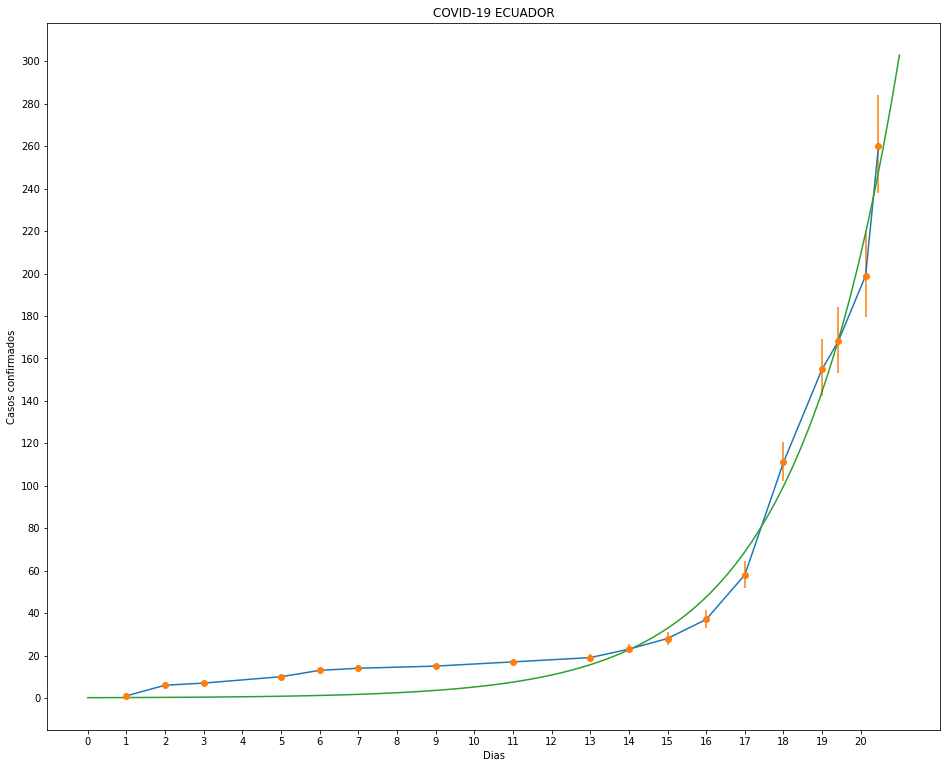

In [0]:
#Graficas

plt.yticks(np.arange(0, 1000, 20)) 
plt.xticks(np.arange(0, 21, 1)) 
plt.plot(marzo194pm,casos194pm)
plt.errorbar(marzo194pm,casos194pm,yerr=errx19marzo4pm, fmt='o')
plt.plot(xdata19marzo4pm,ydata19marzo4pm)
plt.title('COVID-19 ECUADOR')
plt.xlabel('Dias')
plt.ylabel('Casos confirmados')

MODELO 20 DE MARZO 2020 COVID-19 ECUADO



In [0]:
#actualizacion de vectores
marzo20=np.append(marzo194pm,[[21+5/24]])
casos20=np.append(casos194pm,[[367]])
marzo204pm=np.append(marzo20,[[21+11/24]])
casos204pm=np.append(casos20,[[426]])

In [0]:
#Modelo 20 de marzo (contando dato de las 4 pm)
def func(x,a,b):
    return a*np.exp(x*b)
popt, pcov = sco.curve_fit(func,marzo204pm,casos204pm)
xdata20marzo4pm=np.linspace(0,24,100)
#a=0.03965113, b=0.43081681
ydata20marzo4pm=0.03965113*np.exp(xdata20marzo4pm*0.43081681)
def funcmarzo20(x):
    return 0.03965113*np.exp(x*0.43081681)

Text(0, 0.5, 'Casos confirmados')

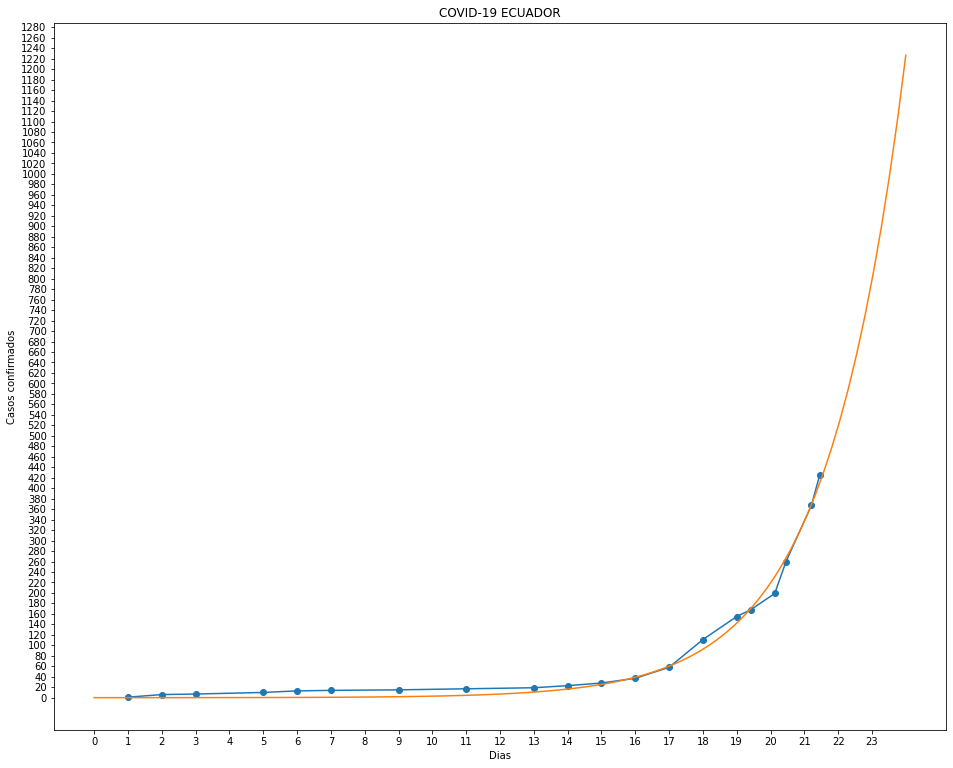

In [0]:
#Graficas
plt.yticks(np.arange(0, 1800, 20)) 
plt.xticks(np.arange(0, 24, 1)) 
plt.plot(marzo204pm,casos204pm)
plt.scatter(marzo204pm,casos204pm)
plt.plot(xdata20marzo4pm,ydata20marzo4pm)
plt.title('COVID-19 ECUADOR')
plt.xlabel('Dias')
plt.ylabel('Casos confirmados')

COMPARACIÓN CASOS COVID-19  QUITO-GUAYAQUIL-MANTA 

In [0]:
#Creación de vectores (Hugo, chequea el formato, el día 1 es 29 de febrero, el día 2 es 1 de marzo, y así), de esta manera
#creas los nuevos vectores. Si te das cuenta cada nuevo punto del array es un día en donde hayan cambiado los datos. Pilas
covidguayas=np.zeros(9)
for i in range(0,2):
    covidguayas[i]=(1+i)
for i in range(2,9):
    covidguayas[i]=(11+i)
covidpichincha=np.zeros(7)
covidpichincha[0]=1
covidpichincha[0+1]=13
covidpichincha[1+1]=14
covidpichincha[2+1]=16
covidpichincha[3+1]=17
covidpichincha[4+1]=19+10/24
covidpichincha[5+1]=20+11/24
covidmanabi=np.zeros(4)
covidmanabi[0]=1
covidmanabi[1]=17
covidmanabi[2]=19
covidmanabi[3]=20+11/24
covidguayas=np.append(covidguayas,[[19+10/24]])
covidguayas=np.append(covidguayas,[[20+3/24]])
covidguayas=np.append(covidguayas,[[20+11/24]])
covidguayas=np.delete(covidguayas,2)
guayascasos=np.zeros(11)
guayascasos[0]=1
guayascasos[1]=6
guayascasos[2]=7
guayascasos[3]=11
guayascasos[4]=19
guayascasos[5]=37
guayascasos[6]=81
guayascasos[7]=119
guayascasos[8]=128
guayascasos[9]=157
guayascasos[10]=187
manabicasos=np.zeros(4)
manabicasos[0]=0
manabicasos[0+1]=1
manabicasos[1+1]=8
manabicasos[2+1]=8
pichinchacasos=np.zeros(7)
pichinchacasos[0]=0
pichinchacasos[0+1]=1
pichinchacasos[1+1]=4
pichinchacasos[2+1]=6
pichinchacasos[3+1]=8
pichinchacasos[4+1]=12
pichinchacasos[5+1]=16

Text(18, 40, 'Caso inicial Manabí \n16/03')

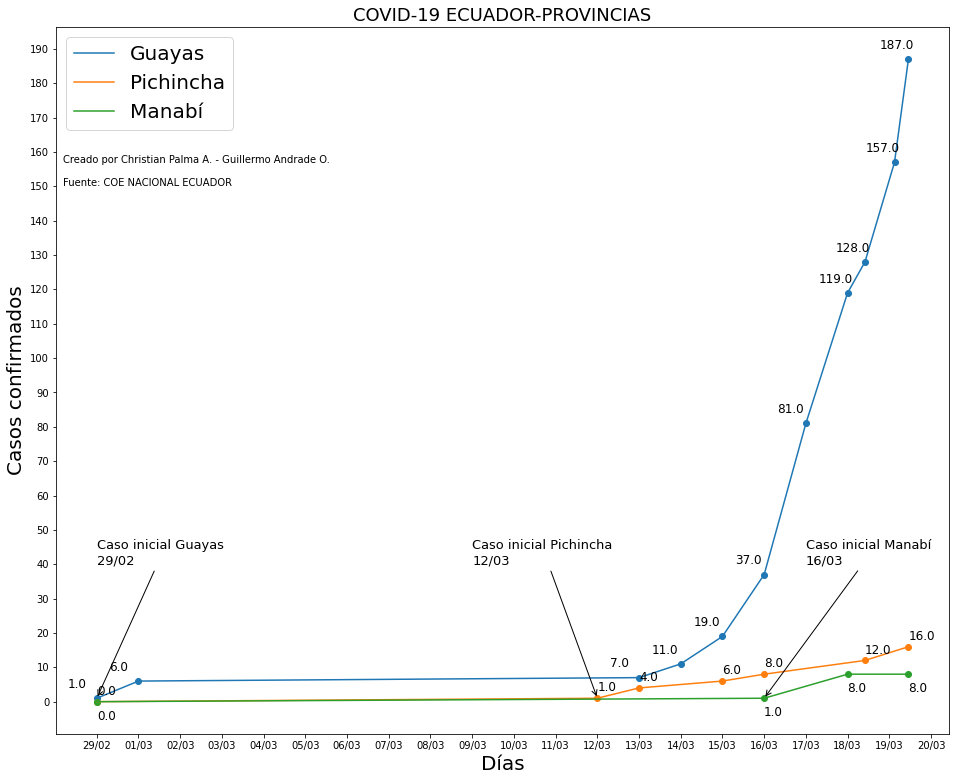

In [0]:
#Formato Final sin diagrama de pastel incorporado
plt.yticks(np.arange(0, 200, 10)) 
plt.xticks(ticks=np.arange(0, 22, 1),labels=['','29/02','01/03','02/03','03/03','04/03','05/03','06/03','07/03','08/03','09/03','10/03','11/03','12/03','13/03','14/03','15/03','16/03','17/03','18/03','19/03','20/03']) 
plt.plot(covidguayas,guayascasos,label='Guayas')
plt.scatter(covidguayas,guayascasos)
plt.plot(covidpichincha,pichinchacasos,label='Pichincha')
plt.scatter(covidpichincha,pichinchacasos)
plt.plot(covidmanabi,manabicasos,label='Manabí')
plt.scatter(covidmanabi,manabicasos)
plt.title('COVID-19 ECUADOR-PROVINCIAS',size='18')
plt.xlabel('Días',size='20')
plt.ylabel('Casos confirmados',size='20')
plt.legend(prop=dict(size='20'))
for a,b in zip(covidguayas,guayascasos):
    plt.text(a-0.7,b+3,str(b),fontsize='12')
for a,b in zip(covidpichincha,pichinchacasos):
    plt.text(a,b+2,str(b),fontsize='12')
for a,b in zip(covidmanabi,manabicasos):
    plt.text(a,b-5.2,str(b),fontsize='12')
plt.text(0.2,150,'Creado por Christian Palma A. - Guillermo Andrade O. \n\nFuente: COE NACIONAL ECUADOR ')
plt.annotate("Caso inicial Guayas \n29/02", xy=(1, 1), xytext=(1, 40),arrowprops=dict(arrowstyle="->"),fontsize='13')
plt.annotate("Caso inicial Pichincha \n12/03", xy=(13, 1), xytext=(10, 40),arrowprops=dict(arrowstyle="->"),fontsize='13')
plt.annotate("Caso inicial Manabí \n16/03", xy=(17, 1), xytext=(18, 40),arrowprops=dict(arrowstyle="->"),fontsize='13')

In [0]:
#Diagrama de pastel

labels = 'Guayas', 'Pichincha', 'Manabí', 'Otras provincias'
sizes = [273, 32, 7, 55]
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')


In [0]:
#actualizacion de vectores
cvidguayas=np.append(covidguayas,[[21+5/24]])#cambiar 0 por día y hora
cvidmanabi=np.append(covidmanabi,[[21+5/24]])#cambiar 0 por día y hora
cvidpichincha=np.append(covidpichincha,[[21+5/24]])#cambiar 0 por día y hora
gcasos=np.append(guayascasos,[[273]])#cambiar 0 por casos
pcasos=np.append(pichinchacasos,[[32]])#cambiar 0 por casos
mcasos=np.append(manabicasos,[[7]])#cambiar 0 por casos

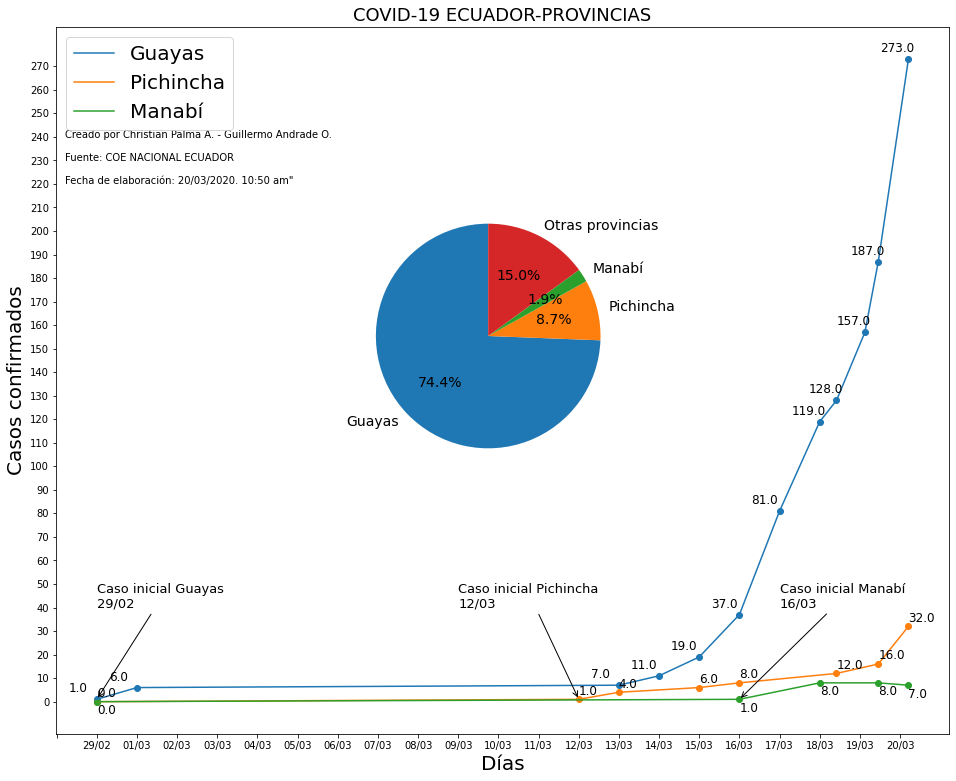

In [0]:
#Formato de Imagen con diagrama de pastel incorporado
plt.yticks(np.arange(0, 280, 10)) 
plt.xticks(ticks=np.arange(0, 22, 1),labels=['','29/02','01/03','02/03','03/03','04/03','05/03','06/03','07/03','08/03','09/03','10/03','11/03','12/03','13/03','14/03','15/03','16/03','17/03','18/03','19/03','20/03']) 
plt.plot(cvidguayas,gcasos,label='Guayas')
plt.scatter(cvidguayas,gcasos)
plt.plot(cvidpichincha,pcasos,label='Pichincha')
plt.scatter(cvidpichincha,pcasos)
plt.plot(cvidmanabi,mcasos,label='Manabí')
plt.scatter(cvidmanabi,mcasos)
plt.title('COVID-19 ECUADOR-PROVINCIAS',size='18')
plt.xlabel('Días',size='20')
plt.ylabel('Casos confirmados',size='20')
plt.legend(prop=dict(size='20'))
for a,b in zip(cvidguayas,gcasos):
    plt.text(a-0.7,b+3,str(b),fontsize='12')
for a,b in zip(cvidpichincha,pcasos):
    plt.text(a,b+2,str(b),fontsize='12')
for a,b in zip(cvidmanabi,mcasos):
    plt.text(a,b-5.2,str(b),fontsize='12')
plt.text(0.2,220,'Creado por Christian Palma A. - Guillermo Andrade O. \n\nFuente: COE NACIONAL ECUADOR \n\nFecha de elaboración: 20/03/2020. 10:50 am"')
plt.annotate("Caso inicial Guayas \n29/02", xy=(1, 1), xytext=(1, 40),arrowprops=dict(arrowstyle="->"),fontsize='13')
plt.annotate("Caso inicial Pichincha \n12/03", xy=(13, 1), xytext=(10, 40),arrowprops=dict(arrowstyle="->"),fontsize='13')
plt.annotate("Caso inicial Manabí \n16/03", xy=(17, 1), xytext=(18, 40),arrowprops=dict(arrowstyle="->"),fontsize='13')
a = plt.axes([.35, .4, .3, .3])
n, bins, patches = plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
         startangle=90, textprops={'fontsize': 14})
plt.xticks([])
plt.yticks([])
plt.show()

COMPARACIÓN CASOS 20 MARZO COVID-19 PICHINCHA-GUAYAS-MANABÍ

In [0]:
#actualización de vectores
cvidguayas204pm=np.append(cvidguayas,[[21+11/24]])
cvidmanabi204pm=np.append(cvidmanabi,[[21+11/24]])
cvidpichincha204pm=np.append(cvidpichincha,[[21+11/24]])
gcasos204pm=np.append(gcasos,[[318]])
pcasos204pm=np.append(pcasos,[[35]])
mcasos204pm=np.append(mcasos,[[9]])

In [0]:
#actualizacion diagrama de pastel
labels = 'Guayas', 'Pichincha', 'Manabí', 'Otras provincias'
sizes = [318, 35, 9, 64]
explode = (0, 0, 0, 0)
colors = [(0,128/255,1),'orange','g','m']

In [0]:
#Grafica (con el total ecuatoriano incorporado)
fig=plt.figure(dpi=1200)
plt.yticks(np.arange(0, 500, 20)) 
plt.xticks(ticks=np.arange(0, 23, 1),labels=['','29/02','01/03','02/03','03/03','04/03','05/03','06/03','07/03','08/03','09/03','10/03','11/03','12/03','13/03','14/03','15/03','16/03','17/03','18/03','19/03','20/03','21/03']) 
plt.plot(cvidguayas204pm,gcasos204pm,label='Guayas 318 casos')
plt.scatter(cvidguayas204pm,gcasos204pm)
plt.plot(cvidpichincha204pm,pcasos204pm,label='Pichincha 35 casos')
plt.scatter(cvidpichincha204pm,pcasos204pm)
plt.plot(cvidmanabi204pm,mcasos204pm,label='Manabí 9 casos')
plt.scatter(cvidmanabi204pm,mcasos204pm)
plt.plot(marzo204pm,casos204pm,label='Total Ecuador 426 casos')
plt.scatter(marzo204pm,casos204pm)
plt.title('COVID-19 ECUADOR-PROVINCIAS',size='18')
plt.xlabel('Días',size='20')
plt.ylabel('Casos confirmados',size='20')
plt.legend(prop=dict(size='20'))
for a,b in zip(cvidguayas204pm,gcasos204pm):
    plt.text(a+0.3,b+4,str(b),fontsize='9')
for a,b in zip(cvidpichincha204pm,pcasos204pm):
    plt.text(a,b+2,str(b),fontsize='9')
for a,b in zip(cvidmanabi204pm,mcasos204pm):
    plt.text(a-0.2,b-7.2,str(b),fontsize='9')
for a,b in zip(marzo204pm,casos204pm):
    plt.text(a-0.4,b+4,str(b),fontsize='9')
plt.text(0.2,310,'Creado por Christian Palma A. - Guillermo Andrade O. \n\nFuente: COE NACIONAL ECUADOR \n\nFecha de elaboración:20/03/2020.23:50am ')
plt.annotate("Caso inicial Guayas \n29/02", xy=(1, 1), xytext=(1, 60),arrowprops=dict(arrowstyle="->"),fontsize='13')
plt.annotate("Caso inicial Pichincha \n12/03", xy=(13, 1), xytext=(10, 60),arrowprops=dict(arrowstyle="->"),fontsize='13')
plt.annotate("Caso inicial Manabí \n16/03", xy=(17, 1), xytext=(19, 60),arrowprops=dict(arrowstyle="->"),fontsize='13')
a = plt.axes([.35, .4, .3, .3])
n, bins, patches = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.xticks([])
plt.yticks([])
plt.show()